<a href="https://colab.research.google.com/github/Ashwin-308/Image_generator/blob/main/new3(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title 1. Install Libraries

!pip install -q diffusers transformers accelerate controlnet_aux opencv-python

# Clear output after installation
from IPython.display import clear_output
clear_output()
print("Libraries installed successfully!")

Libraries installed successfully!


In [2]:
# @title 2. Import Modules
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import CannyDetector, OpenposeDetector
from PIL import Image
import numpy as np
import cv2
from google.colab import files
import io

print("Modules imported.")

/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


Modules imported.


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.11/dist-packages/controlnet_aux/segment_anything/mode

In [3]:
# @title 3. Load ControlNet and Stable Diffusion Models
# This will download the models (can take some time for the first run, ~5-10 GB)
# Make sure your Colab runtime type is set to GPU (Runtime -> Change runtime type -> T4 GPU or A100 GPU)

# Choose the ControlNet model.
# 'lllyasviel/sd-controlnet-canny' is great for preserving outlines.
# 'lllyasviel/sd-controlnet-openpose' is good for preserving human poses.
# Let's start with Canny for general-purpose transformation.

# To use Canny (Recommended for this project type):
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
processor_name = "Canny Edge" # For printing purposes




# Load the base Stable Diffusion pipeline
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

# Using  a faster scheduler for quicker inference
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Enable model offloading to save GPU memory (moves parts of the model to CPU when not in use)
# This is important for Colab's free tier GPUs
pipe.enable_model_cpu_offload()

print(f"Models loaded: Stable Diffusion v1.5 with {processor_name} ControlNet.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models loaded: Stable Diffusion v1.5 with Canny Edge ControlNet.


Saving WIN_20250630_01_56_46_Pro.jpg to WIN_20250630_01_56_46_Pro.jpg
Saving WIN_20250630_01_56_47_Pro (2).jpg to WIN_20250630_01_56_47_Pro (2).jpg
Saving WIN_20250630_01_56_47_Pro.jpg to WIN_20250630_01_56_47_Pro.jpg
Saving WIN_20250630_01_56_48_Pro (2).jpg to WIN_20250630_01_56_48_Pro (2).jpg
Saving WIN_20250630_01_56_48_Pro (3).jpg to WIN_20250630_01_56_48_Pro (3).jpg
Saving WIN_20250630_01_56_48_Pro.jpg to WIN_20250630_01_56_48_Pro.jpg
Saving WIN_20250630_01_56_49_Pro (2).jpg to WIN_20250630_01_56_49_Pro (2).jpg
Saving WIN_20250630_01_56_49_Pro.jpg to WIN_20250630_01_56_49_Pro.jpg
Saving WIN_20250630_01_56_50_Pro (2).jpg to WIN_20250630_01_56_50_Pro (2).jpg
Saving WIN_20250630_01_56_50_Pro.jpg to WIN_20250630_01_56_50_Pro.jpg
Saving WIN_20250630_01_56_51_Pro (2).jpg to WIN_20250630_01_56_51_Pro (2).jpg
Saving WIN_20250630_01_56_51_Pro.jpg to WIN_20250630_01_56_51_Pro.jpg
Saving WIN_20250630_01_56_52_Pro.jpg to WIN_20250630_01_56_52_Pro.jpg
Saving WIN_20250630_01_56_53_Pro.jpg to WI

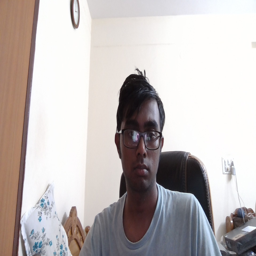


Canny Edge Map (Control Image):


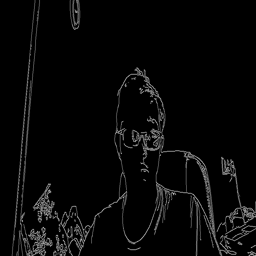

Image pre-processing complete.


In [4]:
# @title 4. Upload Your Image and Pre-process
# @markdown You will be prompted to upload an image file from your computer.
# @markdown It's recommended to use a portrait-style image where the person's face is clearly visible.

uploaded_file = files.upload()

# Get the first uploaded file (assuming only one is uploaded)
image_filename = list(uploaded_file.keys())[0]
original_image = Image.open(io.BytesIO(uploaded_file[image_filename])).convert("RGB")

print(f"Image '{image_filename}' uploaded successfully.")

# Display the original image (resized for better viewing in Colab)
print("\nOriginal Image:")
display(original_image.resize((256, 256))) # Resize for display

# --- Pre-processing based on chosen ControlNet ---
control_image = None

if processor_name == "Canny Edge":
    canny_detector = CannyDetector()
    # Pass the PIL Image directly to the detector
    control_image = canny_detector(original_image, low_threshold=100, high_threshold=200) # Use original_image here
    # CannyDetector already returns a PIL Image in 'L' (grayscale) mode.
    # Convert it to 'RGB' explicitly for the pipeline if it expects it.
    control_image = control_image.convert("RGB") # This line is correct here!
    print("\nCanny Edge Map (Control Image):")
    display(control_image.resize((256, 256)))

elif processor_name == "OpenPose":
    openpose_detector = OpenposeDetector.from_pretrained("lllyasviel/ControlNet/annotator/openpose")
    # Pass the PIL Image directly to the detector
    control_image = openpose_detector(original_image)
    control_image = control_image.convert("RGB") # This line is correct here!
    print("\nOpenPose Skeleton (Control Image):")
    display(control_image.resize((256, 256)))

else:
    print("Error: No specific pre-processor implemented for the selected ControlNet type.")
    control_image = original_image # Fallback, likely won't work well without proper pre-processing

print("Image pre-processing complete.")

Generating avatar with 10 steps and guidance scale 8.0...


  0%|          | 0/10 [00:00<?, ?it/s]


Generated Cyberpunk Avatar:


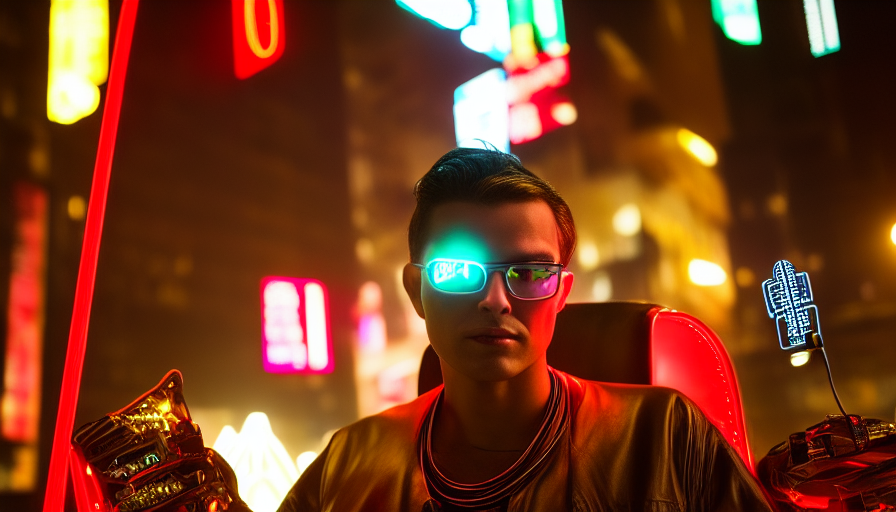

In [5]:
# @title 5. Generate Cyberpunk Avatar
# @markdown Adjust the `prompt`, `negative_prompt`, and generation parameters for desired results.

prompt = "A highly detailed portrait of a person in cyberpunk style, neon lights, glowing circuitry, intricate cybernetic implants, futuristic fashion, rainy dystopian city background, synthwave colors, volumetric lighting, unreal engine, 8k, cinematic, sharp focus" # @param {type:"string"}
negative_prompt = "low quality, blurry, cartoon, anime, ugly, deformed, text, watermark, bad anatomy, grayscale, monochrome, sketch, painting, drawing" # @param {type:"string"}

num_inference_steps = 10 # @param {type:"slider", min:10, max:50, step:1}
guidance_scale = 8.0 # @param {type:"slider", min:1.0, max:15.0, step:0.5}
seed = -1 # @param {type:"number"} - Using -1 for random seed

if seed == -1:
    generator = None
else:
    generator = torch.Generator(device="cpu").manual_seed(seed)

print(f"Generating avatar with {num_inference_steps} steps and guidance scale {guidance_scale}...")

generated_avatar = pipe(
    prompt,
    image=control_image, # This is the pre-processed image from ControlNet
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
).images[0]

print("\nGenerated Cyberpunk Avatar:")
display(generated_avatar)

In [7]:
# @title 6. Save and Download the Generated Avatar
# Display the output file as

output_filename = "cyberpunk_avatar.png" # @param {type:"string"}
generated_avatar.save(output_filename)
files.download(output_filename)

print(f"Avatar saved as '{output_filename}' and downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Avatar saved as 'cyberpunk_avatar.png' and downloaded.
